In [2]:
from rcviz import viz
from IPython.display import Image

In [3]:
@viz
def fib1(n):
    assert n>=0
    return n if n<=1 else fib1(n-1)+fib1(n-2)

In [4]:
fib1(5)

rendered to fib1.png


5

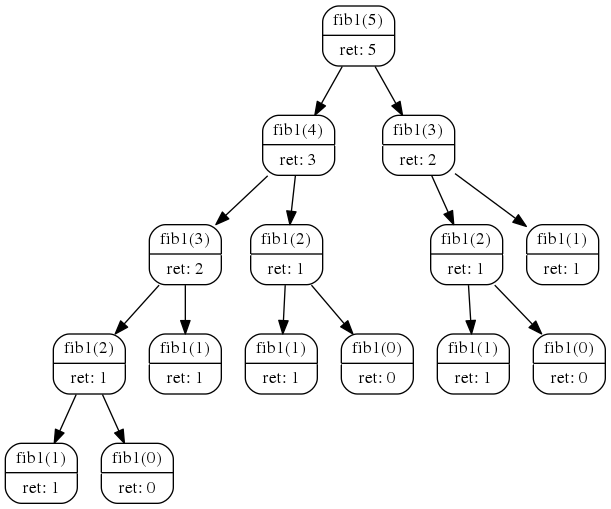

In [5]:
Image('fib1.png')

In [6]:
cache = {}

In [7]:
def fib2(n):
    assert n>=0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n-1) + fib2(n-2)
    return cache[n]

In [8]:
fib2(80)

23416728348467685

In [9]:
fib2(800)

69283081864224717136290077681328518273399124385204820718966040597691435587278383112277161967532530675374170857404743017623467220361778016172106855838975759985190398725

In [10]:
fib2 = viz(fib2)

In [11]:
fib2(5)

rendered to fib2.png


5

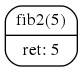

In [12]:
Image('fib2.png')

In [13]:
cache

{0: 0,
 1: 1,
 2: 1,
 3: 2,
 4: 3,
 5: 5,
 6: 8,
 7: 13,
 8: 21,
 9: 34,
 10: 55,
 11: 89,
 12: 144,
 13: 233,
 14: 377,
 15: 610,
 16: 987,
 17: 1597,
 18: 2584,
 19: 4181,
 20: 6765,
 21: 10946,
 22: 17711,
 23: 28657,
 24: 46368,
 25: 75025,
 26: 121393,
 27: 196418,
 28: 317811,
 29: 514229,
 30: 832040,
 31: 1346269,
 32: 2178309,
 33: 3524578,
 34: 5702887,
 35: 9227465,
 36: 14930352,
 37: 24157817,
 38: 39088169,
 39: 63245986,
 40: 102334155,
 41: 165580141,
 42: 267914296,
 43: 433494437,
 44: 701408733,
 45: 1134903170,
 46: 1836311903,
 47: 2971215073,
 48: 4807526976,
 49: 7778742049,
 50: 12586269025,
 51: 20365011074,
 52: 32951280099,
 53: 53316291173,
 54: 86267571272,
 55: 139583862445,
 56: 225851433717,
 57: 365435296162,
 58: 591286729879,
 59: 956722026041,
 60: 1548008755920,
 61: 2504730781961,
 62: 4052739537881,
 63: 6557470319842,
 64: 10610209857723,
 65: 17167680177565,
 66: 27777890035288,
 67: 44945570212853,
 68: 72723460248141,
 69: 117669030460994,
 70

In [14]:
cache.clear()

In [15]:
fib2(5)

rendered to fib2.png


5

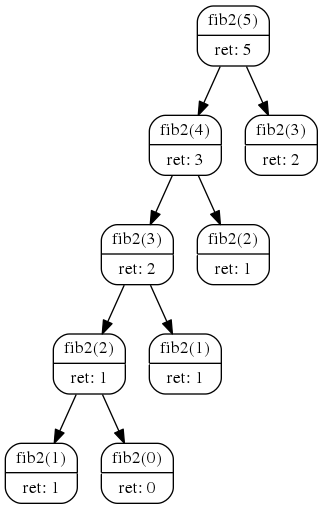

In [16]:
Image('fib2.png')

In [27]:
def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return inner

In [28]:
@memo
def fib1(n):
    assert n>=0
    return n if n<=1 else fib1(n-1)+fib1(n-2)

In [29]:
fib1(80)

23416728348467685

In [19]:
from functools import lru_cache

In [22]:
@lru_cache(maxsize=None)
def fib1(n):
    assert n>=0
    return n if n<=1 else fib1(n-1)+fib1(n-2)

In [23]:
fib1(80)

23416728348467685

In [24]:
fib1(8000)

RecursionError: maximum recursion depth exceeded in comparison

In [25]:
def fib3(n):
    assert n>=0
    f0,f1=0,1
    for i in range(n-1):
        f0,f1=f1,f0+f1
    return f1

In [26]:
fib3(8)

21

In [27]:
fib3(8000)

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

In [28]:
import time

In [29]:
def timed(f, *args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1-t0)
    return acc

In [30]:
timed(fib3,800)

8.076899985098862e-05

In [39]:
from matplotlib import pyplot as plt

In [44]:
def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, [arg]) for arg in args], label=f.__name__)
    plt.legend()
    plt.grid(True)

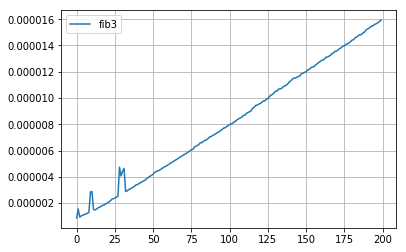

In [48]:
compare([fib3], list(range(200)))

In [34]:
!wget https://gist.githubusercontent.com/superbobry/db16053267b778069c9e/raw/0e5aebef66110d0a814c03a16e0c587808aa14ea/timing.py

--2018-04-06 23:33:34--  https://gist.githubusercontent.com/superbobry/db16053267b778069c9e/raw/0e5aebef66110d0a814c03a16e0c587808aa14ea/timing.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.84.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 455 [text/plain]
Saving to: ‘timing.py.1’

timing.py.1         100%[===================>]     455  --.-KB/s    in 0s      

2018-04-06 23:33:34 (31.6 MB/s) - ‘timing.py.1’ saved [455/455]



In [36]:
from timing import timed, compare